### 1. Loading Data & Basic Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load 
data = pd.read_csv('train.csv')

In [3]:
# Get the amount of rows
num_rows = data.shape[0]
print(f"There are {num_rows} rows，indicating there are {num_rows} passengers。")

There are 891 rows，indicating there are 891 passengers。


In [4]:
# Get the amount of columns
num_columns = data.shape[1]
print(f"There are {num_columns} columns")


There are 12 columns


In [5]:
# Display the first five rows
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
# Caculate the number of survived passengers
num_survived = data[data['Survived'] == 1].shape[0]
print(f"There are {num_survived} passengers that survived.")

There are 342 passengers that survived.


In [7]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


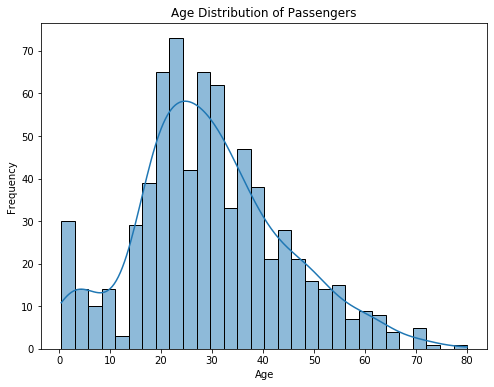

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

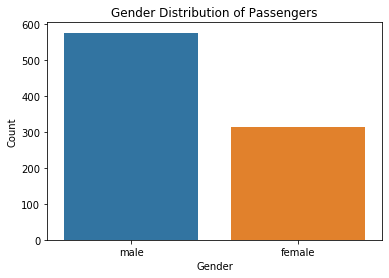

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=data)
plt.title('Gender Distribution of Passengers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

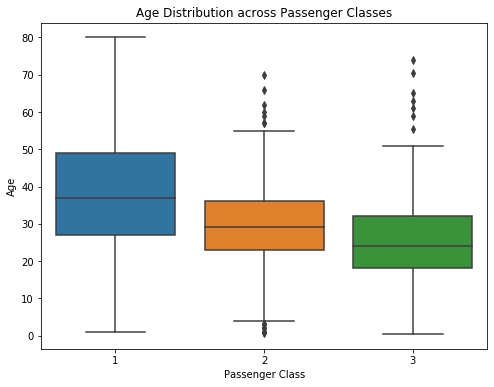

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=data)
plt.title('Age Distribution across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

### 2. Data Transformation 

#### (b) Display the names of different variables

In [11]:
# Show all variables' name
variable_names = data.columns
print("Variable name：", variable_names)

Variable name： Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


- 'PassengerId': 'Passenger ID, unique identifier for each passenger'
- 'Survived': 'Target variable, 1 means survived, 0 means not survived'
- 'Pclass': 'Cabin class, 1 is first class, 2 is second class, 3 is third class'
- 'Name': 'Passenger name'
- 'Sex': 'Gender, may be related to survival rate'
- 'Age': 'Age, may affect the probability of survival',
- 'SibSp': 'The number of siblings or spouses on board, may affect the survival rate'
- 'Parch': 'The number of parents or children on board, may affect the survival rate'
- 'Ticket': 'Ticket number, may have no direct effect'
- 'Fare': 'Fare, may be related to socioeconomic status'
- 'Cabin': 'Cabin number, partially missing, may provide location-related information'
- 'Embarked': 'Boarding port'

#### (b) Handle missing values

In [12]:
# Check missing value
missing_values = data.isnull().sum()
print("Missing value：\n", missing_values)

Missing value：
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
# Use average age to fill the missing value in 'Age'
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)

In [14]:
data.drop(columns=['Cabin'], inplace=True)  # 'Cabin' has many missing value, therefore, delete missing rows
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # 'Embarked' Fill in with majority

In [15]:
print("Check missing value again：\n", data.isnull().sum())

Check missing value again：
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### (c) How many columns are left after handling missing variables?

In [16]:
# Number of columns after handling missing values
num_columns = data.shape[1]
print(f"After processing missing values, the data set has {num_columns} columns.")

After processing missing values, the data set has 11 columns.


### 3. One-Hot Encoding(OHC)

#### (a) Identify categorical variable suitable for one-hot-encoding 

In [17]:
# Check the data type and find non-numeric variables
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical variables suitable for one-hot encoding are:", categorical_columns)

Categorical variables suitable for one-hot encoding are: Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


#### (b) Shuffle the dataset and split it into training and test sets. 

In [18]:
# View the data before OHC
print("the data before OHC:")
print(data[categorical_columns].head())

the data before OHC:
                                                Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Embarked  
0         A/5 21171        S  
1          PC 17599        C  
2  STON/O2. 3101282        S  
3            113803        S  
4            373450        S  


In [19]:
# One-hot encoding of categorical variables
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [20]:
# View the data after OHC
print("the data after OHC")
print(data.head())

the data after OHC
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0            1         0       3  22.0      1      0   7.2500   
1            2         1       1  38.0      1      0  71.2833   
2            3         1       3  26.0      0      0   7.9250   
3            4         1       1  35.0      1      0  53.1000   
4            5         0       3  35.0      0      0   8.0500   

   Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Name_Abelson, Mr. Samuel  ...  Ticket_W./C. 14258  Ticket_W./C. 14263  \
0                         0  ...             

### 4. Data Splitting

#### (a) Separate the features and target variable for the training and test sets.

In [21]:
# Separate the target variable from the features
X = data.drop('Survived', axis=1)  # Features
y = data['Survived']  # target variable

#### (b) Shuffle the dataset and split it into training and test sets. 

In [22]:
from sklearn.model_selection import train_test_split

# Divide the data set into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Print dataset shape
print("Training set feature shape:", X_train.shape)
print("Testing set feature shape:", X_test.shape)
print("Training set target shape", y_train.shape)
print("Testing set target shape", y_test.shape)

Training set feature shape: (712, 1579)
Testing set feature shape: (179, 1579)
Training set target shape (712,)
Testing set target shape (179,)


### 5. Building the Decision Tree Model

#### (a) Use a decision tree classifier with criterion entropy and max_depth of 5. 

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Use a decision tree classifier with criterion entropy and max_depth of 5
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)

C:\RRCApp\Anaconda\AnacondaInstall\envs\NeuralNetworksandDeepLearning\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\RRCApp\Anaconda\AnacondaInstall\envs\NeuralNetworksandDeepLearning\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

#### (b) Fit the model on the training set. 

In [24]:
dt_model.fit(X_train, y_train)

C:\RRCApp\Anaconda\AnacondaInstall\envs\NeuralNetworksandDeepLearning\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

#### (c) Score your tree. 

In [25]:
from sklearn.metrics import accuracy_score

train_score = dt_model.score(X_train, y_train)
print(f"Model scores on the training set: {train_score}")

test_score = dt_model.score(X_test, y_test)
print(f"Model scores on the testing set: {test_score}")

Model scores on the training set: 0.851123595505618
Model scores on the testing set: 0.8100558659217877


#### (d）Give a visualization of the decision tree. Ensure the tree's features and class names are appropriately labeled. 

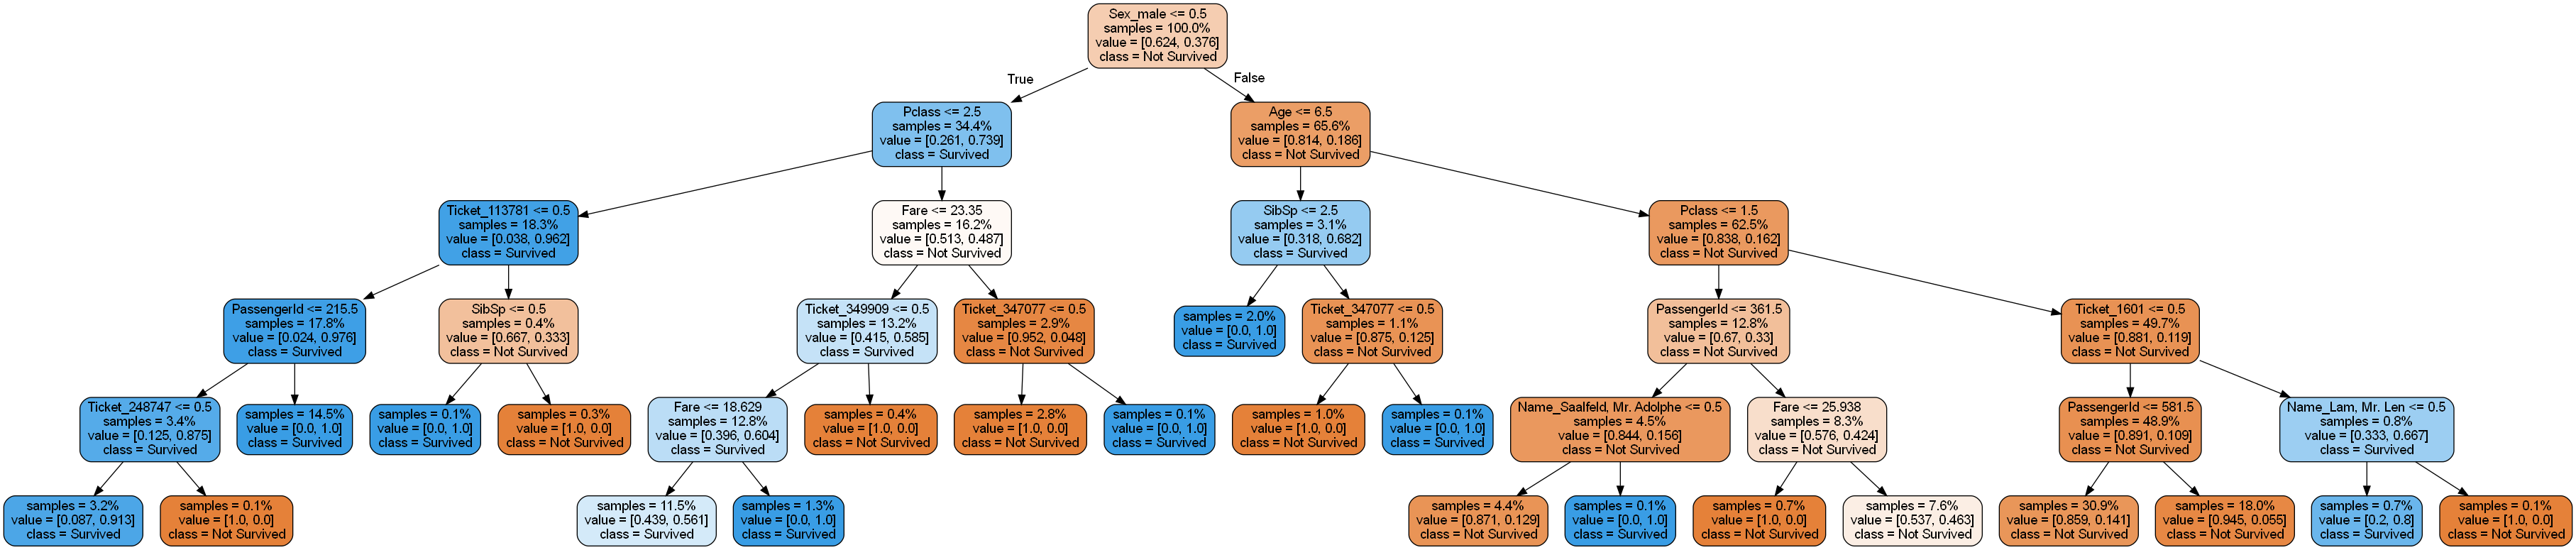

In [26]:
from sklearn import tree
import graphviz
from IPython.display import Image
dot_data = tree.export_graphviz(dt_model, out_file=None, label="all", impurity=False, proportion=True,
                                feature_names=X_train.columns, class_names=["Not Survived", "Survived"],
                                filled=True, rounded=True)


graph = graphviz.Source(dot_data, format='png')
graph.render("decision_tree")  # Save png file
Image(filename="decision_tree.png")  # Display picture

#### (e) According to your tree, what are the top two level splitting features?

The first two split features of the decision tree are:

**First level (root node)**: Sex_male (gender)
**Second level**: Pclass (passenger class) and Age (age)

This shows that **gender** is the most important feature, followed by **cabin class and age**, which play a key role in predicting whether a passenger survives from the disaster.

#### (f) Would Gini be appropriate here as well? Why? 

Yes, Gini can be used. Gini and Entropy are both measures of node purity that are generally similar in effect, but are calculated slightly differently.  
Gini is more efficient to compute and is suitable for larger datasets.   
Since both Gini and Entropy split the data effectively, using Gini in this case will give similar results while potentially being faster.  

### 6. Model Evaluation using Cross-Validation

#### (a) Evaluate the model's performance using 5-fold cross-validation. Is accuracy an appropriate metric, why? 

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
# Evaluate the model using 5-fold cross validation
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')

# Output the accuracy of each cross validation
print("The accuracy of each cross validation:", cv_scores)

The accuracy of each cross validation: [0.69832402 0.80446927 0.82022472 0.79775281 0.83050847]


C:\RRCApp\Anaconda\AnacondaInstall\envs\NeuralNetworksandDeepLearning\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\RRCApp\Anaconda\AnacondaInstall\envs\NeuralNetworksandDeepLearning\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may

Based on the output of the 5-fold cross-validation, the model's accuracy across 5 folds shows  small fluctuations and stable performance. 

In the Titanic dataset, the proportion of survivors and non-survivors is not perfectly balanced but close. Therefore, accuracy is a suitable metric to reflect the overall performance of the model. Moreover, survior and non-survivors is a binary question where accuracy is a suitable metrics.


#### (b) Report the mean accuracy and its +/-variance.

In [29]:
# Calculate the mean accuracy and its +/-variance.
mean_accuracy = np.mean(cv_scores)
variance = np.std(cv_scores)

print(f"Mean accuracy: {mean_accuracy:.3f} (+/- {variance:.3f})")

Mean accuracy: 0.790 (+/- 0.047)


### 7. Hyperparameter Tuning

#### a) Test the decision tree classifier with different max depths ranging from 1 to 20.

In [30]:
max_depths = range(1, 21)

#### b) For each depth, evaluate the model using 5-fold cross-validation. 

In [31]:
# Iterate over each depth
for depth in max_depths:
    # Use Entropy as the standard to train the model and perform cross validation
    dt_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=42)
    entropy_scores = cross_val_score(dt_entropy, X, y, cv=5, scoring="accuracy")

C:\RRCApp\Anaconda\AnacondaInstall\envs\NeuralNetworksandDeepLearning\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\RRCApp\Anaconda\AnacondaInstall\envs\NeuralNetworksandDeepLearning\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may

In [37]:
# Print the average accuracy and variance of the Entropy model
print("Max depth:%d, Entropy Accuracy: %0.3f (+/- %0.3f)" % (depth, entropy_scores.mean(), entropy_scores.std()*2))

Max depth:20, Entropy Accuracy: 0.741 (+/- 0.201)


#### c) Try gini, do you get better results? Do the top splitting features change from question 5e? Include Gini in your grid search.

In [38]:
for depth in max_depths:
    # Use Gini as the criterion to train the model and perform cross validation
    dt_gini = DecisionTreeClassifier(criterion="gini", max_depth=depth, random_state=42)
    gini_scores = cross_val_score(dt_gini, X, y, cv=5, scoring="accuracy")

C:\RRCApp\Anaconda\AnacondaInstall\envs\NeuralNetworksandDeepLearning\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\RRCApp\Anaconda\AnacondaInstall\envs\NeuralNetworksandDeepLearning\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may

In [39]:
# Print the average accuracy and variance of the Gini model
print("Max depth:%d, Gini Accuracy: %0.3f (+/- %0.3f)" % (depth, gini_scores.mean(), gini_scores.std() * 2))

Max depth:20, Gini Accuracy: 0.777 (+/- 0.187)


### 8. Entropy and Gini

#### a) Write Python code that calculates the entropy of a dataset D. You may assume that the classes are comprised of integers. Include printouts of the test cases. 

- Input: List of dataset. 
- Output: The entropy of the list 
- Test Cases: 
    - [1,2,2,3,3,3] 
    - [1,1,1,1,1,1,1,1,1,1] 
    - [2,3] 

In [40]:
import math
from collections import Counter

In [41]:
def calculate_entropy(data):
    # Calculate the frequency of each category
    counts = Counter(data)
    total_count = len(data)
    
    # Calculate the entropy
    entropy = 0
    for count in counts.values():
        probability = count / total_count
        entropy -= probability * math.log2(probability)
    
    return entropy

In [42]:
# Test case
test_cases = [
    [1, 2, 2, 3, 3, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [2, 3]
]

In [43]:
# Print the entropy of each test case
for i, test_case in enumerate(test_cases, 1):
    entropy = calculate_entropy(test_case)
    print(f"Test case {i}: {test_case} -> Entropy: {entropy:.3f}")

Test case 1: [1, 2, 2, 3, 3, 3] -> Entropy: 1.459
Test case 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] -> Entropy: 0.000
Test case 3: [2, 3] -> Entropy: 1.000


#### b) Write Python code that calculates the Gini of a non-empty dataset D. You may  assume that the classes are comprised of integers. Include the definitions of both Entropy and Gini. Comment your code. Include printouts of the test cases. 
- Input: List of dataset 
- Output: Gini of the list 
- Test Cases: 
    - [1,2,2,3,3,3] 
    - [1,1,1,1,1,1,1,1,1,1] 
    - [2,3]

In [51]:
# Define a function to calculate Gini
def calculate_gini(data):
    # Calculate the frequency of each category
    counts = Counter(data)
    total_count = len(data)
    
    # Calculate Gini
    gini = 1
    for count in counts.values():
        probability = count / total_count
        gini -= probability ** 2
    
    return gini

In [52]:
# Calculate and print the Entropy and Gini coefficient for each test case
for i, test_case in enumerate(test_cases, 1):
    entropy = calculate_entropy(test_case)
    gini = calculate_gini(test_case)
    print(f"Test case {i}: {test_case} -> Entropy: {entropy:.3f}, Gini: {gini:.3f}")

Test case 1: [1, 2, 2, 3, 3, 3] -> Entropy: 1.459, Gini: 0.611
Test case 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] -> Entropy: 0.000, Gini: 0.000
Test case 3: [2, 3] -> Entropy: 1.000, Gini: 0.500


### Predict on the test.csv

#### Process the test_data

In [55]:
# Load test_data
test_data = pd.read_csv("test.csv")

In [57]:
# Check missing value
missing_values = test_data.isnull().sum()
print("Missing value：\n", missing_values)



Missing value：
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [58]:
# Handle missing values

test_mean_age = test_data['Age'].mean()
test_data['Age'].fillna(test_mean_age, inplace=True)


test_data.drop(columns=['Fare'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

In [60]:
# Check missing value again
missing_values = test_data.isnull().sum()
print("Missing value：\n", missing_values)

Missing value：
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64


In [64]:
# Check the data type and find non-numeric variables
test_categorical_columns = test_data.select_dtypes(include=['object']).columns
print("Categorical variables suitable for one-hot encoding are:", test_categorical_columns)

Categorical variables suitable for one-hot encoding are: Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [66]:
# One-hot encoding of categorical variables
test_data = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)

# View the test_data after OHC
print("the test_data after OHC")
print(test_data.head())

the test_data after OHC
   PassengerId  Pclass   Age  SibSp  Parch  Name_Abelseth, Miss. Karen Marie  \
0          892       3  34.5      0      0                                 0   
1          893       3  47.0      1      0                                 0   
2          894       2  62.0      0      0                                 0   
3          895       3  27.0      0      0                                 0   
4          896       3  22.0      1      1                                 0   

   Name_Abelseth, Mr. Olaus Jorgensen  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Name_Abrahamsson, Mr. Abraham August Johannes  \
0                                              0   
1                                              0   
2                                              0   
3                                       

In [68]:
# Make sure the columns in test_data are consistent with X_train
for col in X_train.columns:
    if col not in test_data.columns:
        test_data[col] = 0  # Add missing columns, filling with 0

# Reorder according to the column order of X_train
test_data = test_data[X_train.columns]

In [69]:
# Use the model the predict on the test_data
predictions = dt_model.predict(test_data)

# Get the csv file
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions
})
submission.to_csv("submission.csv", index=False)
